In [ ]:
import pandas as pd
import re
import nltk
from tqdm import tqdm
from transformers import pipeline


c:\Data\Binus\dl_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jeffrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jeffrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "indobenchmark/indobert-base-p1"
)

df = pd.read_csv('vario125street_raw_comments.csv')

kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
# 2. DEFINISIKAN TOPIK CUSTOM ANDA DI SINI
custom_topic = {
            # 1. PERFORMA & MESIN (Tarikan, Kecepatan, Tenaga)
            "Performance": [
                "tenaga", "power", "torsi", "torque", "speed", "kecepatan", "kencang", "ngebut", 
                "tarikan", "akselerasi", "napas", "top speed", "responsif", "jambak", "ngacir", 
                "lemot", "boyo", "berat", "ngempos", "gerung", "loyo", "kurang tenaga", 
                "nanjak", "kuat nanjak", "napas panjang", "napas pendek", "limiter", "rpm",
                "matic", "125", "150", "160", "sped", "tenagae", "tenagga", "powerr", "torq", "tork", "tros", "speeed",
                "kenceng", "kencang", "ngibrit", "ngeloyor", "ngeden", "akselarasi", "akselerasi",
                "nafas", "nafas panjang", "nafas pendek", "rpm tinggi", "rpm rendah", "napas", "mogok", "mati", "susah hidup",
                "brebet", "nyendat", "gredek", "panas", "overheat", "ngebul", "asap",
                "lemoot", "lelet", "beraaat", "narik", "tarikannya",
            ],

            # 2. DESIGN & ESTETIKA (Tampilan, Warna, Gaya)
            "Design": [
                "desain", "design", "designya", "model", "tampang", "bentuk", "gaya", "style", "look", "modern",
                "ganteng", "keren", "jelek", "aneh", "wagu", "kaku", "culun", "futuristik", 
                "retro", "klasik", "sporty", "elegan", "mewah", "garang", "agresif", "lancip",
                "headlamp", "lampu depan", "stoplamp", "buntut", "fairing", "striping", "stiker", 
                "livery", "decal", "facelift", "proporsional", "bongsor", "gambot", "ramping", "desainnya", "designnya", "modelnya",
                "gantengg", "kereen", "jelekk", "sporti", "elegant", "futuristik", "body", "bodynya",
                "lampu", "lamps","bongsorr", "rampingg", "modif", "stang"
            ],

            # 3. WARNA (Sub-kategori Design yang sering dibahas spesifik)
            "Color": [
                "warna", "cat", "paint", "doff", "matte", "glossy", "metalik", 
                "merah", "hitam", "putih", "biru", "silver", "abu", "kuning", "hijau",
                "two tone", "polos", "kelir", "pudar", "kusam", "belang", "krem" ,"warnanya", "colour",
                "item", "putihh", "abu2", "abu abu", "biruu", "silverr", "dof", "dop", "metalic",
                "two-tone", "twotone"
            ],

            # 4. BUILD QUALITY (Kualitas Material & Ketahanan)
            "Build Quality": [
                "build quality", "kualitas", "material", "bahan", "plastik", "besi", "baja",
                "rangka", "frame", "esaf", "keropos", "karat", "karatan", "patah", "lipat",
                "sambungan", "las", "las-lasan", "rapi", "kasar", "finishing", "celah", "gap",
                "bodi", "body", "getar", "koplak", "bunyi", "ringkih", "tipis", "tebal", "spakbor",
                "kokoh", "padat", "kopong", "awet", "tahan lama", "reog", "oblak",  "build", "kualitaas",
                "plastikan", "besinya", "geterr", "vibrasi", "ringkihh", "kerasa murahan", "kokohh", "padett",
                "reog", "oblag", "oblak", "tangguh", "solid", "berat", "kuat", "bobot", "tipis", "tipisin", "part", "rem", "remnya",
                "crancase", "pengereman", "bocor", "rembes", "netes", "oli", "getar",  "bunyi", "brisik", "klotok", "kasar"
            ],

            # 5. KENYAMANAN & ERGONOMI (Posisi Berkendara)
            "Comfort": [
                "nyaman", "enak", "keras", "empuk","ringan", "suspensi", "shock", "shockbreaker", 
                "jok", "busa", "kulit jok", "posisi duduk", "riding position", "segitiga", 
                "stang", "setang", "tekuk", "pegal", "pegel", "jinjit", "tinggi", "pendek", 
                "handling", "manurver", "lincah", "stabil", "anteng", "limbung", "oleng", 
                "boncengan", "pijakan", "dek", "luas", "sempit", "getaran mesin", "ground clearance",
                "polisi tidur","nyamann", "enaaak", "kerass", "empukkk", "handlingnya", "handlng",
                "lincahh", "antengg", "olengg", "limbungg", "bonceng", "dibonceng", "joknya", "suspensinya",
                "ban", "ban depan", "ban belakang", "licin", "grip", "nempel", "keras", "empuk",
                "stabil", "selip"
            ],

            # 6. FITUR & TEKNOLOGI
            "Features": [
                "fitur", "teknologi", "canggih", "lengkap", "minim fitur",
                "keyless", "smart key", "remote", "kunci", "kontak", "alarm", "answer back",
                "speedometer", "panel", "instrumen", "digital", "analog", "layar", "indikator",
                "abs", "cbs", "rem", "iss", "idling stop", "sss", "charger", "usb", "soket", 
                "lampu", "led", "projie", "drp", "hazard", "connected", "bluetooth", "fiturnya", "fitur2",
                "keyles", "key less", "spidometer", "spdometer", "speedo", "panelnya", "lednya", "usb charger",
                "bluetooh", "bluetoothnya", "error", "ga berfungsi", "mati", "delay"
            ],

            # 7. UTILITAS (Kepraktisan Harian)
            "Utility": [
                "bagasi", "penyimpanan", "laci", "konsol", "helm in", "muat helm", "helm",
                "tangki", "kapasitas", "liter", "galon", "dek rata", "gantungan", "hook",  "bagasinya", "bagasi luas",
                "muatt", "muat banyak", "helm fullface", "gantungan barang"
            ],

            # 8. EFISIENSI & BIAYA (Irit, Harga, Jual Kembali)
            "Fuel": [
                    "irit", "irittt", "boros", "boross", "hemat", "konsumsi", "konsumsi bbm",
                    "bbm", "bbmm", "bensin", "pertalite", "pertamax", "shell", "vpower",
                    "km/l", "kmpl", "km / l", "kml", "satu liter", "per liter",
                    "jarak tempuh", "isi full", "tangki", "kapasitas bensin"
            ],

            "Price": [
                    "harga", "harganya", "price", "mahal", "murah", "murahan",
                    "kemahalan", "overprice", "overpriced", "terjangkau", "worth it", "worthed", "worthit",
                    "jt", "jtaan", "juta", "jutaan", "cicilan", "kredit", "dp", "angsuran", "jutaaa",
                    "diskon", "promo", "resale", "resale value", "jual kembali", "second", "bekas", "anjlok", "umr"
            ],

            # 9. MASALAH TEKNIS (Troubleshooting & Keluhan Umum)
            "Issues": [
                "masalah", "penyakit", "minus", "keluhan", "cacat", "defect",
                "mogok", "mati", "susah hidup", "brebet", "nyendat", "gredek", "cv t getar",
                "bocor", "rembes", "netes", "oli", "asap", "ngebul", "vampir oli",
                "panas", "overheat", "kipas nyala", "radiator", 
                "bunyi", "brisik", "klotok", "nglitik", "kasar", "cit cit"
            ],

            # 10. AFTERSALES (Bengkel & Sparepart)
            "Aftersales": [
                "servis", "service", "bengkel", "mekanik", "montir", "antri", 
                "sparepart", "suku cadang", "onderdil", "inden", "langka", "gampang", "mudah",
                "ori", "kw", "aftermarket", "garansi", "klaim", "dealer", "sales"
            ]
        }

def cleaning(text, kamus_tidak_baku):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # boleh, tapi jangan stemming
    text = re.sub(r"\s+", " ", text).strip()

    words = text.split()
    normalized_words = [
        kamus_tidak_baku.get(word, word) for word in words
    ]
    
    return " ".join(normalized_words)

# 3. Fungsi Pemecah Kalimat (Tanpa Tanda Baca Baku)
def split_into_segments(text):
    if not isinstance(text, str): return []
    
    # Kata-kata pemisah (Splitter Words)
    # Jika program menemukan kata ini, kalimat akan dipotong
    split_words = [
        'tapi', 'tp', 'tpi', 'cuma', 'cuman', 'cm', 'sayang', 'syg',
        'soalnya', 'soal', 'karena', 'krn', 'karna', 'namun', 'sedangkan',
        'padahal', 'walaupun', 'meskipun', 'tros', 'trus', 'terus',
        'apalagi', 'kecuali', 'bedanya', 'biar', 'kalo', 'kl', 'kalau'
    ]
    
    text = text.lower()
    text = re.sub(r'[\.\?\!\n,]+', ' ||| ', text)
    pattern = r'\b(' + '|'.join(split_words) + r')\b'
    text = re.sub(pattern, ' ||| ', text)
    segments = text.split(' ||| ')
    
    return [seg.strip() for seg in segments if seg.strip() and len(seg.strip()) > 3]

def chunk_if_long(text, max_tokens=32):
    tokens = tokenizer.tokenize(text)
    if len(tokens) <= max_tokens:
        return [text]

    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i+max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks


# 4. Fungsi Klasifikasi
def classify_segment(text, topic_dict):
    scores = {topic: 0 for topic in topic_dict}
    for topic, keywords in topic_dict.items():
        for keyword in keywords:
            if re.search(r'\b' + re.escape(keyword) + r'\b', text):
                scores[topic] += 1
    
    max_score = max(scores.values())
    return max(scores, key=scores.get) if max_score > 0 else "Lainnya/Umum"

# 5. Eksekusi: "Explode" Dataframe (1 Komentar jadi Banyak Baris)
new_rows = []

for idx, row in df.iterrows():
    original_comment = row['comment']
    segments = split_into_segments(original_comment)

    if not segments:
        segments = [original_comment]

    for seg in segments:
        seg_clean = cleaning(seg, kamus_tidak_baku_dict)

        # chunk kalau masih kepanjangan
        seg_chunks = chunk_if_long(seg_clean, max_tokens=32)

        for chunk in seg_chunks:
            topic = classify_segment(chunk, custom_topic)

            new_rows.append({
                'original_comment_id': idx,
                'original_comment': original_comment,
                'segment_mentah': seg,
                'segment_indobert': chunk,
                'predicted_topic': topic
            })


# Buat DataFrame Baru
df_segmented = pd.DataFrame(new_rows)
df_segmented.to_excel('pretrained_comments.xlsx', index=False)

# Preview
print("Contoh Hasil Pemecahan:")
print(df_segmented[['original_comment', 'segment_mentah', 'segment_indobert', 'predicted_topic']].head(10))

Contoh Hasil Pemecahan:
                                    original_comment  \
0  mas popo pernah review KZR pribadinya ga? klo ...   
1  mas popo pernah review KZR pribadinya ga? klo ...   
2  mas popo pernah review KZR pribadinya ga? klo ...   
3          semakin modern... semakin ringan bobotnya   
4          semakin modern... semakin ringan bobotnya   
5                      Awal thn posting vario killer   
6  Coba ban nya pake model stylo yg gambot… lbh c...   
7  Mantab, terimakasih om untuk refrensi motor te...   
8  Mantab, terimakasih om untuk refrensi motor te...   
9  Mantab, terimakasih om untuk refrensi motor te...   

                                      segment_mentah  \
0           mas popo pernah review kzr pribadinya ga   
1                                            klo blm   
2          boleh dong review buat segmen motor lawas   
3                                     semakin modern   
4                            semakin ringan bobotnya   
5                      

# MODELLING
1 = Negative, 2 = Neutral, 3 = Positive

In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   original_comment_id  2032 non-null   int64 
 1   original_comment     2032 non-null   object
 2   segment_mentah       2032 non-null   object
 3   segment_indobert     2032 non-null   object
 4   sentiment            2032 non-null   int64 
 5   predicted_topic      2032 non-null   object
dtypes: int64(2), object(4)
memory usage: 95.4+ KB


In [83]:
df_final = pd.read_csv('labeled_comments.csv')
df_final = df_final.drop(columns = ['Unnamed: 0'])
df_final = df_final.dropna().reset_index(drop=True)
df_final.head()

,original_comment_id,original_comment,segment_mentah,segment_indobert,sentiment,predicted_topic
0,0,mas popo pernah review KZR pribadinya ga? klo ...,mas popo pernah review kzr pribadinya ga,mas popo pernah review kzr pribadinya tidak,2,Lainnya/Umum
1,0,mas popo pernah review KZR pribadinya ga? klo ...,klo blm,kalau belum,2,Lainnya/Umum
2,0,mas popo pernah review KZR pribadinya ga? klo ...,boleh dong review buat segmen motor lawas,boleh dong review buat segmen motor lawas,2,Lainnya/Umum
3,1,semakin modern... semakin ringan bobotnya,semakin modern,semakin modern,3,Design
4,1,semakin modern... semakin ringan bobotnya,semakin ringan bobotnya,semakin ringan bobotnya,3,Comfort


In [87]:
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, BertTokenizer
from datasets import Dataset
print("Label sebelum diperbaiki:", df_final['sentiment'].unique())
label_mapping = {1: 0,2: 1,3: 2
}

if df_final['sentiment'].max() > 2:
    print("Melakukan mapping label...")
    df_final['sentiment'] = df_final['sentiment'].map(label_mapping)

print("Label setelah diperbaiki:", df_final['sentiment'].unique())

model_name = "indobenchmark/indobert-base-p1"
tokenizer = BertTokenizer.from_pretrained(model_name)
train_df, test_df = train_test_split(df_final,test_size=0.2,random_state=42, stratify=df_final['sentiment'])

def tokenize_function(example):
    tokenized = tokenizer(example["segment_indobert"], truncation=True)
    # Langsung simpan sebagai 'labels'
    tokenized['labels'] = example['sentiment'] 
    return tokenized

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

columns_to_remove = ['original_comment', 'segment_mentah','predicted_topic', 'original_comment_id']

train_dataset = train_dataset.remove_columns(columns_to_remove)
test_dataset = test_dataset.remove_columns(columns_to_remove)

train_dataset.set_format("torch")
test_dataset.set_format("torch")

print("\nExample of tokenized comment:")
print(train_dataset[0])

Label sebelum diperbaiki: [2 3 1]
Melakukan mapping label...
Label setelah diperbaiki: [1 2 0]


Map: 100%|██████████| 407/407 [00:00<00:00, 4517.12 examples/s]


Example of tokenized comment:
{'segment_indobert': 'dalem banget sakitnya', 'sentiment': tensor(0), '__index_level_0__': tensor(1566), 'input_ids': tensor([    2, 14938,  2174, 16374,     3]), 'token_type_ids': tensor([0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1]), 'labels': tensor(0)}


In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_score": f1_score(labels, preds, average="weighted"),
        "precision": precision_score(labels, preds, average="weighted"),
        "recall": recall_score(labels, preds, average="weighted"),
    }


results = []
best_f1 = -1
best_config = None
best_metrics = None

In [89]:
import torch
import os

best_lr = 5e-05
best_batch_size = 16
best_epochs = 4

print(f"Memulai Final Training dengan -> LR: {best_lr}, Batch: {best_batch_size}, Epochs: {best_epochs}")

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3
)

final_args = TrainingArguments(
    output_dir="./indobert_final_run",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1,
    
    # Parameter Terbaik
    learning_rate=best_lr,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=best_batch_size,
    num_train_epochs=best_epochs,
    
    weight_decay=0.01,
    logging_steps=10,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


final_trainer = Trainer(
    model=model,
    args=final_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    # Ganti 'tokenizer=tokenizer' menjadi 'data_collator=data_collator'
    data_collator=data_collator, 
    compute_metrics=compute_metrics
)

# ==================================================================
# 5. EKSEKUSI TRAINING
# ==================================================================
print("Training dimulai...")
final_trainer.train()
print("Training selesai!")

# ==================================================================
# 6. SIMPAN MODEL FINAL
# ==================================================================
save_path = "./model_indobert_final"

print(f"Menyimpan model ke: {save_path}")
final_trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)

print("✅ Model berhasil disimpan dan siap digunakan di tempat lain.")

Memulai Final Training dengan -> LR: 5e-05, Batch: 16, Epochs: 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training dimulai...


c:\Data\Binus\dl_venv\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1 Score,Precision,Recall
1,0.589700,0.663041,0.707617,0.705521,0.704067,0.707617
2,0.270200,0.889020,0.717445,0.685247,0.701009,0.717445
3,0.128600,1.178319,0.683047,0.684020,0.685214,0.683047
4,0.032200,1.542550,0.668305,0.673281,0.680242,0.668305


c:\Data\Binus\dl_venv\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Data\Binus\dl_venv\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Data\Binus\dl_venv\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training selesai!
Menyimpan model ke: ./model_indobert_final
✅ Model berhasil disimpan dan siap digunakan di tempat lain.


c:\Data\Binus\dl_venv\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Accuracy: 0.7076167076167076

Classification Report:
               precision    recall  f1-score   support

    Negative       0.51      0.51      0.51        87
     Neutral       0.80      0.81      0.81       269
    Positive       0.56      0.49      0.52        51

    accuracy                           0.71       407
   macro avg       0.62      0.60      0.61       407
weighted avg       0.70      0.71      0.71       407



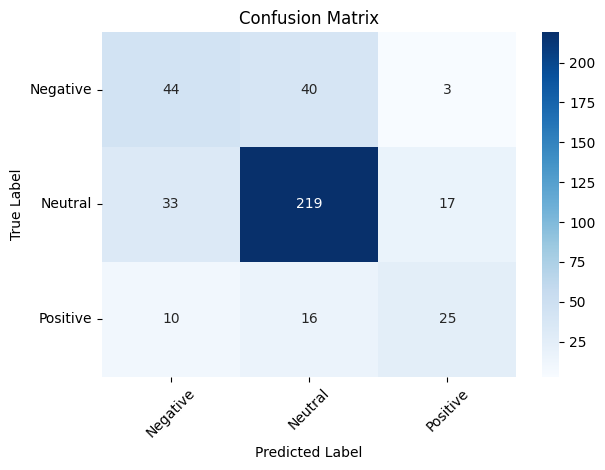

In [92]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
f_pred = final_trainer.predict(test_dataset)
f_y_true = f_pred.label_ids
f_y_pred = np.argmax(f_pred.predictions, axis=1)

all_label_names = ['Negative', 'Neutral', 'Positive']

labels_in_data = sorted(list(unique_labels(f_y_true, f_y_pred)))
used_label_names = [all_label_names[i] for i in labels_in_data]

print("Accuracy:", accuracy_score(f_y_true, f_y_pred))
print("\nClassification Report:\n", classification_report(f_y_true, f_y_pred, target_names=used_label_names))

cm = confusion_matrix(f_y_true, f_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=used_label_names, yticklabels=used_label_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_3320\372654790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_labels, y=sentiment_count.values, palette='pastel')


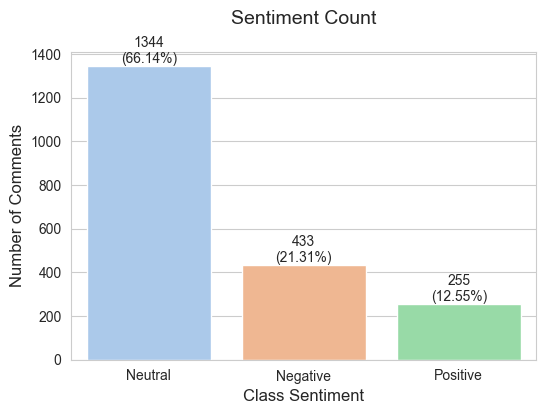

In [95]:
import seaborn as sns
sentiment_count = df_final['sentiment'].value_counts()
sns.set_style('whitegrid')
sentiment_names = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiment_labels = [sentiment_names[i] for i in sentiment_count.index]

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_labels, y=sentiment_count.values, palette='pastel')
plt.title('Sentiment Count', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)

total = len(df_final['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
model.save_pretrained("./model_honda_final")
tokenizer.save_pretrained("./model_honda_final")
print("[+] Model Custom Berhasil Disimpan!")